In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
city = pd.read_csv("city_day.csv", parse_dates = ['Date'], index_col = ['Date'])

In [3]:
city.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
type(city.index[0])

pandas._libs.tslibs.timestamps.Timestamp

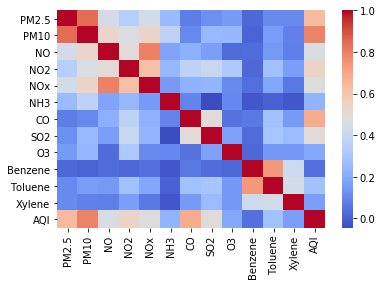

In [5]:
sns.heatmap(city.corr(), cmap = 'coolwarm')

In [6]:
df = city[['City','AQI','AQI_Bucket']]

In [7]:
df.head()

,City,AQI,AQI_Bucket
Date,,,
2015-01-01,Ahmedabad,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN


# Stationarity of the time series

In [8]:
df['AQI_Bucket'].value_counts()

Moderate        7813
Satisfactory    6847
Poor            2691
Very Poor       2319
Severe          1337
Good             930
Name: AQI_Bucket, dtype: int64

Text(53.625, 0.5, 'AQI')

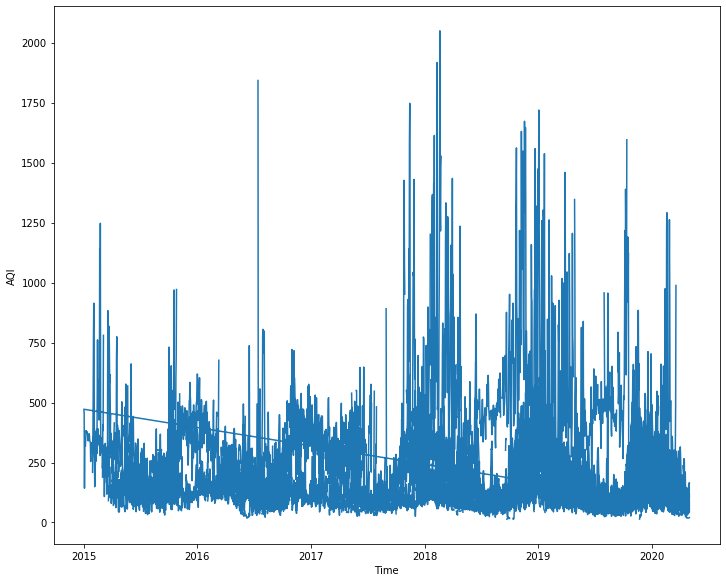

In [9]:
plt.figure(figsize=(10,8))
plt.plot(df['AQI'])
plt.tight_layout()
plt.xlabel('Time')
plt.ylabel('AQI')

In [10]:
count = 0
for i in range(len(df['AQI_Bucket'])):
    if df['AQI_Bucket'][i] == 6:
        count+=1
print(count)

0


In [11]:
cities=pd.unique(df['City'])
column_1= cities+'_AQI'
column_2=cities+'_AQI_Bucket'
columns=[*column_1,*column_2]

In [12]:
dataset=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column_1)
for city,i in zip(cities, dataset.columns):
    n=len(np.array(df[df['City']==city]['AQI']))
    dataset[i][-n:]=np.array(df[df['City']==city]['AQI'])

D:\Anaconda\Anaconda_installation\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Convering daily data to monthly data

In [13]:
dataset=dataset.astype('float64')
dataset=dataset.resample(rule='MS').mean()

In [14]:
dataset.tail()

,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Delhi_AQI,...,Jaipur_AQI,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI
2020-01-01,294.111111,NaN,88.032258,104.806452,95.322581,160.516129,155.518519,94.064516,87.516129,308.451613,...,112.451613,162.935484,156.111111,216.935484,272.645161,168.645161,262.838710,68.619048,301.413793,78.258065
2020-02-01,547.689655,NaN,67.103448,128.740741,96.482759,128.620690,136.370370,93.379310,78.137931,262.137931,...,125.241379,167.000000,121.068966,197.724138,216.655172,159.206897,201.206897,93.576923,192.321429,88.620690
2020-03-01,277.466667,65.350000,52.548387,83.733333,90.741935,109.714286,124.100000,55.419355,70.290323,135.838710,...,100.935484,163.166667,129.166667,122.838710,134.000000,104.645161,158.419355,67.870968,117.250000,74.741935
2020-04-01,120.733333,39.233333,44.400000,58.708333,68.533333,113.782609,137.923077,44.586207,63.500000,113.000000,...,86.200000,121.400000,77.033333,70.366667,106.733333,74.333333,131.166667,75.750000,132.137931,57.066667
2020-05-01,134.000000,20.000000,54.000000,109.000000,75.000000,121.000000,106.000000,59.000000,65.000000,144.000000,...,163.000000,110.000000,56.000000,69.000000,82.000000,64.000000,118.000000,NaN,101.000000,82.000000


In [15]:
dataset['Overall_AQI'] = dataset.mean(axis=1)

Text(0, 0.5, 'AQI')

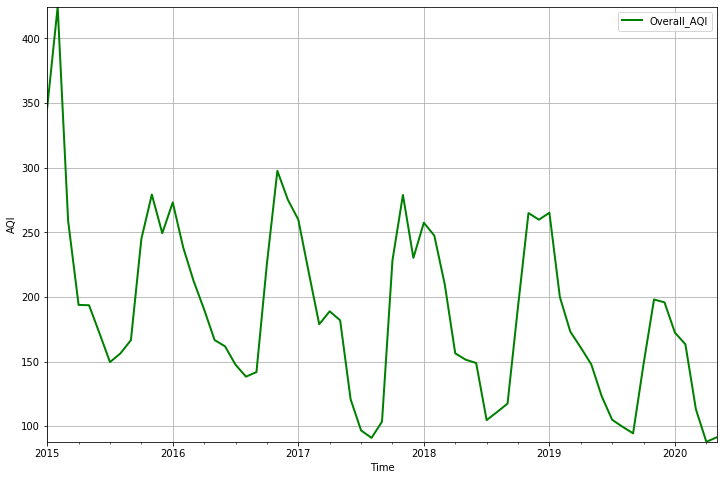

In [16]:
ax = dataset[['Overall_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Green')
ax.autoscale(enable=True, axis='both', tight=True)
plt.xlabel('Time')
plt.ylabel('AQI')

# Checking Stationarity

In [17]:
timeseries = dataset['Overall_AQI']
timeseries.head(10)

2015-01-01    346.311828
2015-02-01    424.284286
2015-03-01    258.875688
2015-04-01    193.815995
2015-05-01    193.556272
2015-06-01    171.850000
2015-07-01    149.597849
2015-08-01    156.327957
2015-09-01    166.556173
2015-10-01    244.828389
Freq: MS, Name: Overall_AQI, dtype: float64

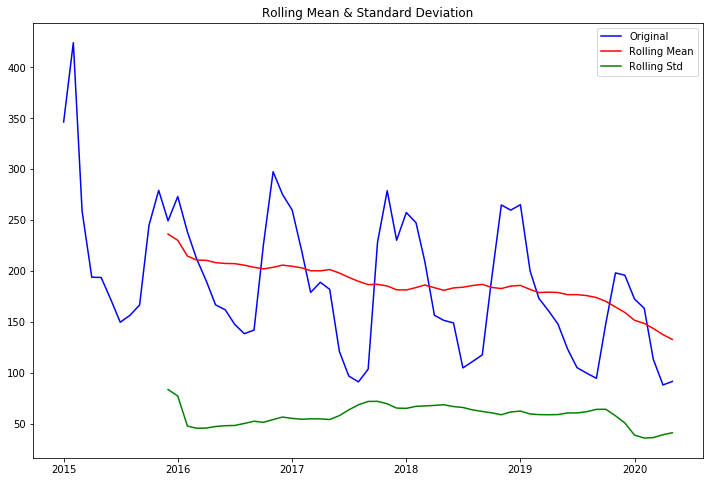

Results of Dickey-Fuller Test:
Test Statistic                  0.070464
p-value                         0.963986
#Lags Used                     10.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = pd.Series.rolling(timeseries, 12).mean()
    rolstd = pd.Series.rolling(timeseries, 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(timeseries)

# Eliminating Trend

Text(0, 0.5, 'Log transform')

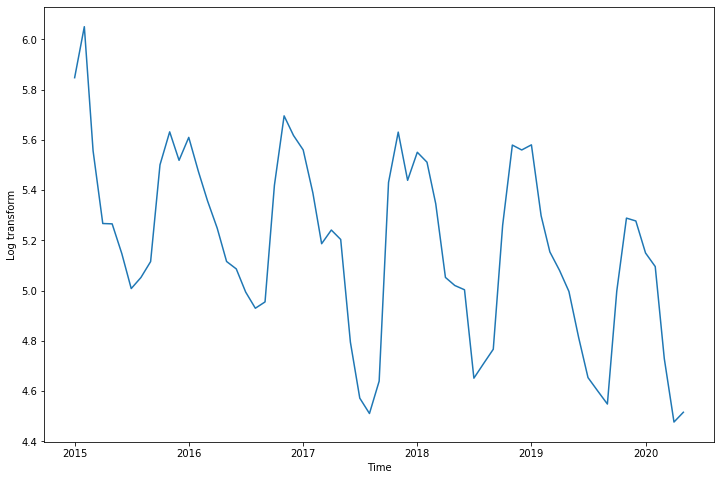

In [19]:
plt.figure(figsize=(12,8))
timeseries_log = np.log(timeseries)
plt.plot(timeseries_log)
plt.xlabel('Time')
plt.ylabel('Log transform')

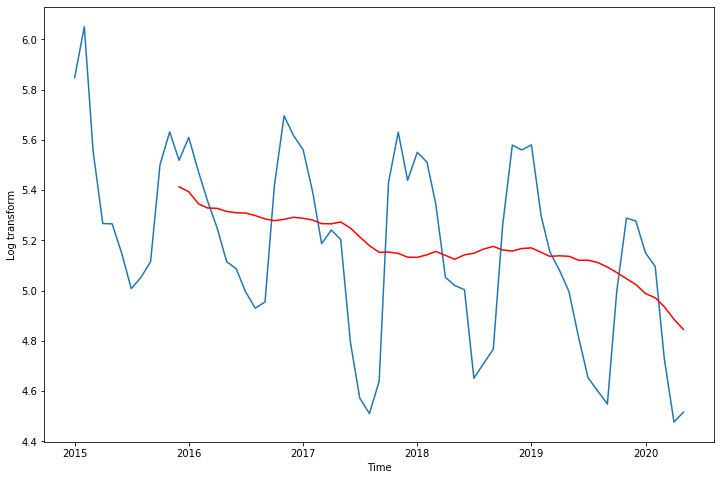

In [20]:
moving_avg = pd.Series.rolling(timeseries_log,12).mean()
plt.figure(figsize=(12,8))
plt.xlabel('Time')
plt.ylabel('Log transform')
plt.plot(timeseries_log)
plt.plot(moving_avg, color='red')

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [21]:
timeseries_log_moving_avg_diff = timeseries_log - moving_avg
timeseries_log_moving_avg_diff.head(12)

2015-01-01         NaN
2015-02-01         NaN
2015-03-01         NaN
2015-04-01         NaN
2015-05-01         NaN
2015-06-01         NaN
2015-07-01         NaN
2015-08-01         NaN
2015-09-01         NaN
2015-10-01         NaN
2015-11-01         NaN
2015-12-01    0.105197
Freq: MS, Name: Overall_AQI, dtype: float64

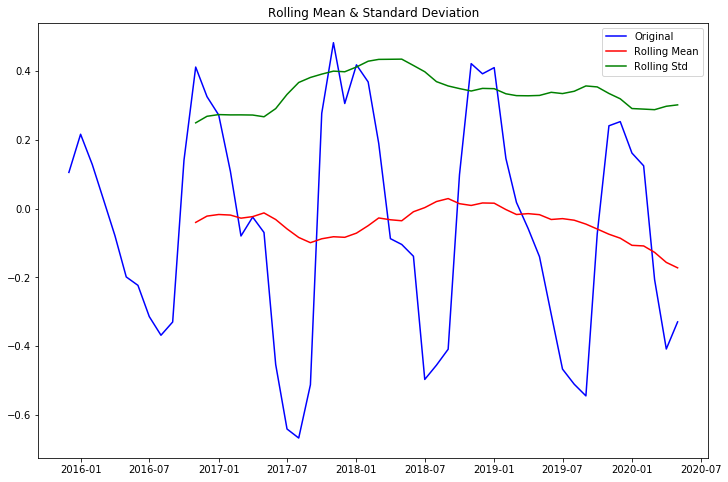

Results of Dickey-Fuller Test:
Test Statistic                  0.241417
p-value                         0.974491
#Lags Used                     11.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [22]:
timeseries_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(timeseries_log_moving_avg_diff)

# Seasonal decomposition of the AQI values of India

<Figure size 864x576 with 0 Axes>

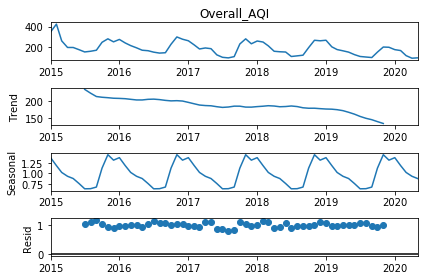

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
Overall_AQI = dataset['Overall_AQI']
result = seasonal_decompose(Overall_AQI, model='multiplicative')
plt.figure(figsize=(12,8))
result.plot();

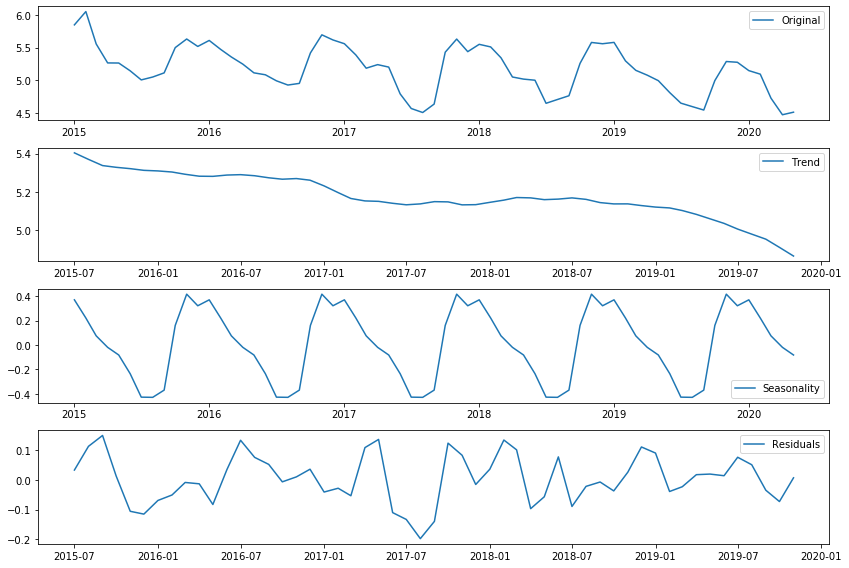

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(timeseries_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(timeseries_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

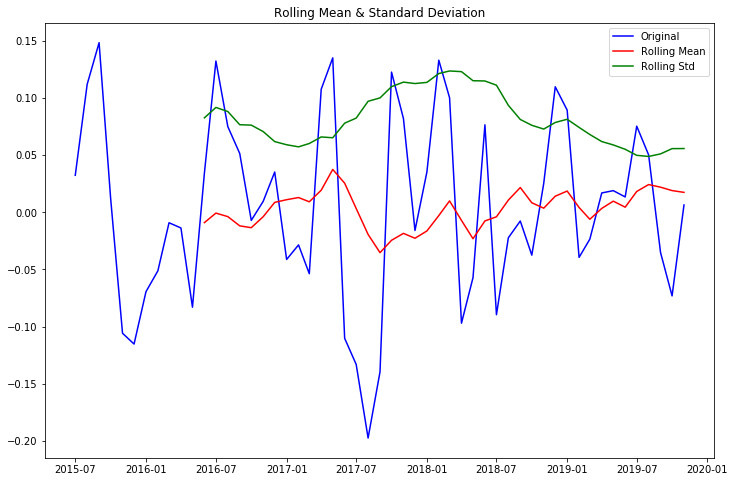

Results of Dickey-Fuller Test:
Test Statistic                 -3.561225
p-value                         0.006547
#Lags Used                     10.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [25]:
timeseries_log_decompose = residual
timeseries_log_decompose.dropna(inplace=True)
test_stationarity(timeseries_log_decompose)

# Differencing

Text(0, 0.5, 'Log differential')

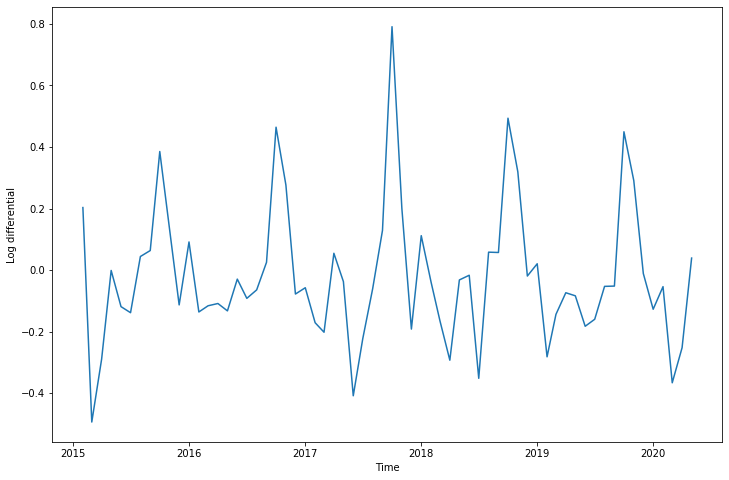

In [26]:
plt.figure(figsize=(12,8))
timeseries_log_diff = timeseries_log - timeseries_log.shift()
plt.plot(timeseries_log_diff)
plt.xlabel('Time')
plt.ylabel('Log differential')

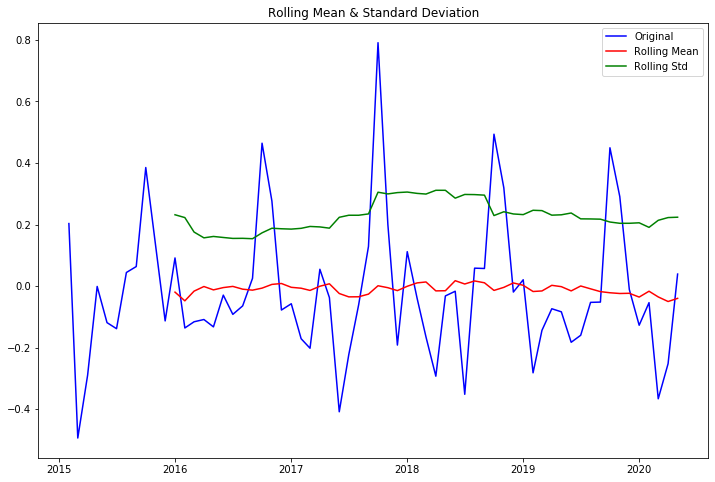

Results of Dickey-Fuller Test:
Test Statistic                -8.078244e+00
p-value                        1.485325e-12
#Lags Used                     9.000000e+00
Number of Observations Used    5.400000e+01
Critical Value (1%)           -3.557709e+00
Critical Value (5%)           -2.916770e+00
Critical Value (10%)          -2.596222e+00
dtype: float64


In [27]:
timeseries_log_diff.dropna(inplace=True)
test_stationarity(timeseries_log_diff)

# Forecasting

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [29]:
Overall_AQI = dataset['Overall_AQI']

We run auto arima to find out the parameters of the model for us because it is easier for us to let is happen on its own.

In [30]:
auto_arima(y= Overall_AQI, start_p = 0, start_P = 0, start_q = 0, start_Q = 0, seasonal = True, m = 12).summary()

D:\Anaconda\Anaconda_installation\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\Anaconda\Anaconda_installation\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\Anaconda\Anaconda_installation\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
D:\Anaconda\Anaconda_installation\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   65
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -314.846
Date:                            Wed, 20 May 2020   AIC                            641.691
Time:                                    23:52:30   BIC                            654.644
Sample:                                         0   HQIC                           646.794
                                             - 65                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2160      0.792     -0.273      0.785      -1.768       1.336
ar.L1         -0.7919      0.120     -6.610      0.000      -1.027      -0.557
ma.L1          0.9999      9.769      0.102      0.918     -18.147      20.146
ar.S.L12       0.9564      0.076     12.634      0.000       0.808       1.105
ma.S.L12      -0.6664      0.278     -2.395      0.017      -1.212      -0.121
sigma2       907.1368   8820.674      0.103      0.918   -1.64e+04    1.82e+04
===================================================================================
Ljung-Box (Q):                       29.49   Jarque-Bera (JB):                22.19
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
len(Overall_AQI)

65

In [32]:
#dividing into train and test:
train = Overall_AQI[:41]
test = Overall_AQI[42:54]

In [33]:
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

D:\Anaconda\Anaconda_installation\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Overall_AQI   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -204.793
Date:                            Wed, 20 May 2020   AIC                            419.586
Time:                                    23:52:30   BIC                            428.030
Sample:                                01-01-2015   HQIC                           422.639
                                     - 05-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6703      0.203     -3.309      0.001      -1.067      -0.273
ma.L1          0.9999     30.227      0.033      0.974     -58.244      60.244
ar.S.L12       0.9310      0.266      3.504      0.000       0.410       1.452
ma.S.L12      -0.6351      0.693     -0.916      0.360      -1.994       0.724
sigma2      1297.5614    3.9e+04      0.033      0.973   -7.52e+04    7.78e+04
===================================================================================
Ljung-Box (Q):                       48.23   Jarque-Bera (JB):                12.75
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.66
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

Text(0, 0.5, 'AQI')

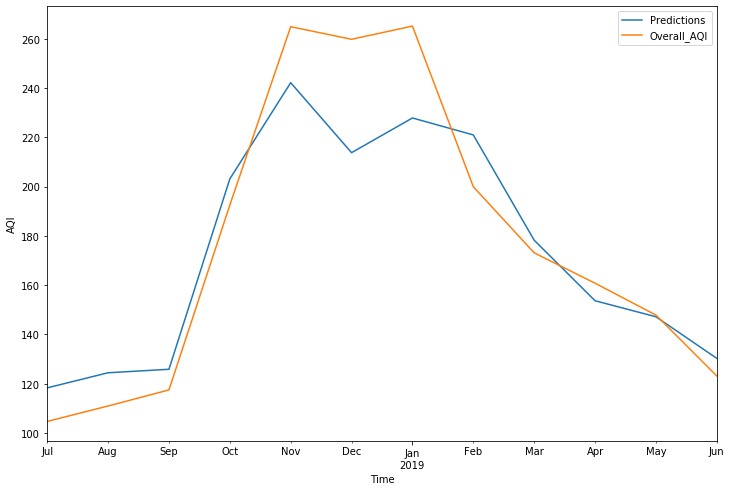

In [35]:
#Plotting predicted values against the true values:
plt.figure(figsize=(12,8))
predictions.plot(legend=True)
test.plot(legend=True)
plt.xlabel('Time')
plt.ylabel('AQI')

In [36]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error = ', rms_error)
print('Mean AQI = ',test.mean())

Root Mean Squared Error =  20.696138920301195
Mean AQI =  176.68763588530942


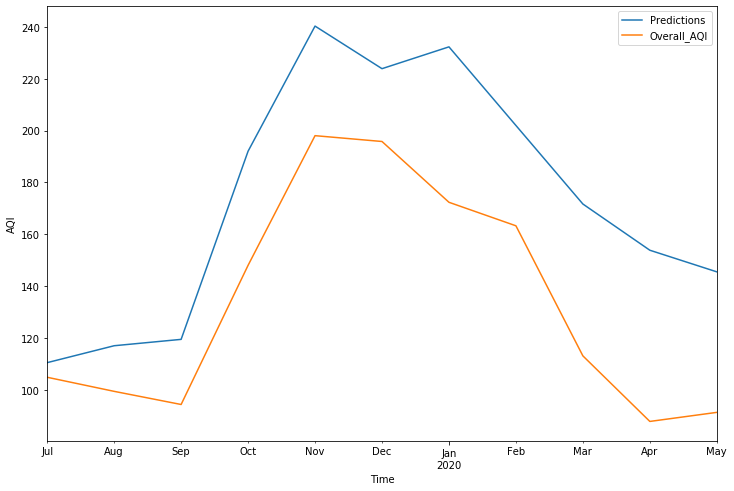

In [37]:
#dividing into train and test:
train = Overall_AQI[:53]
test = Overall_AQI[54:]
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=54, end=64, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
plt.figure(figsize=(12,8))
plt.xlabel('Time')
plt.ylabel('AQI')
predictions.plot(legend=True)
test.plot(legend=True)

In [38]:
#Finding RMSE for the year 2019-2020:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error = ', rms_error)
print('Mean AQI = ',test.mean())

Root Mean Squared Error =  43.95679693172662
Mean AQI =  133.55768465497644


# Predicting into the future

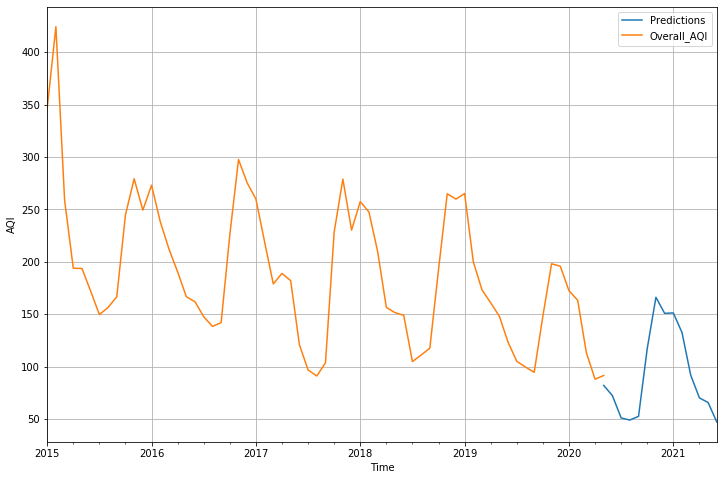

In [39]:
# Forming the model:
model=SARIMAX(Overall_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
plt.xlabel('Time')
plt.ylabel('AQI')
Overall_AQI.plot(legend=True,figsize=(12,8),grid=True)